In [1]:
import pandas as pd
merged_standardized = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_standardized_dummy.parquet')
merged_normalized = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_normalized_dummy.parquet')
merged_data = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_filtred_dummy.parquet')
merged_default = pd.read_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/data/merge_filtred_default.parquet')

Código de Boa Noite faz com que a dimensionalidade seja levada em conta.

In [2]:
merged_padronized = merged_data.div(merged_data.sum(axis=1), axis='rows')
merged_padronized

,yellow_cards,red_cards,goals,assists,club_name_1.fc union berlin,club_name_ac milan,club_name_aek athens,club_name_ajax amsterdam,club_name_arsenal fc,club_name_as monaco,...,club_formation_4-4-1-1,club_formation_4-4-2,club_formation_4-4-2 Diamond,club_formation_4-4-2 double 6,club_formation_4-5-1,club_formation_4-5-1 flat,club_formation_5-3-2,club_formation_5-4-1,team_type_away,team_type_home
0,0.222222,0.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000
1,0.083333,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083333,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.083333
2,0.400000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.200000
3,0.416667,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.083333,0.000000
4,0.375000,0.0,0.125000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.125,0.000000,0.0,0.0,0.0,0.0,0.000000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.000000,0.0,0.200000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.200000,0.000000
2627,0.222222,0.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.111111
2628,0.222222,0.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.111111,0.0,0.0,0.0,0.0,0.111111,0.000000
2629,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.166667


# Elbow method to find optimal number of clusters

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
distortions = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
    print(n_clus) 
    distortions.append(KMeans(n_clusters=n_clus,max_iter = 10_000, n_init = 100, random_state= 61658).fit(merged_padronized).inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


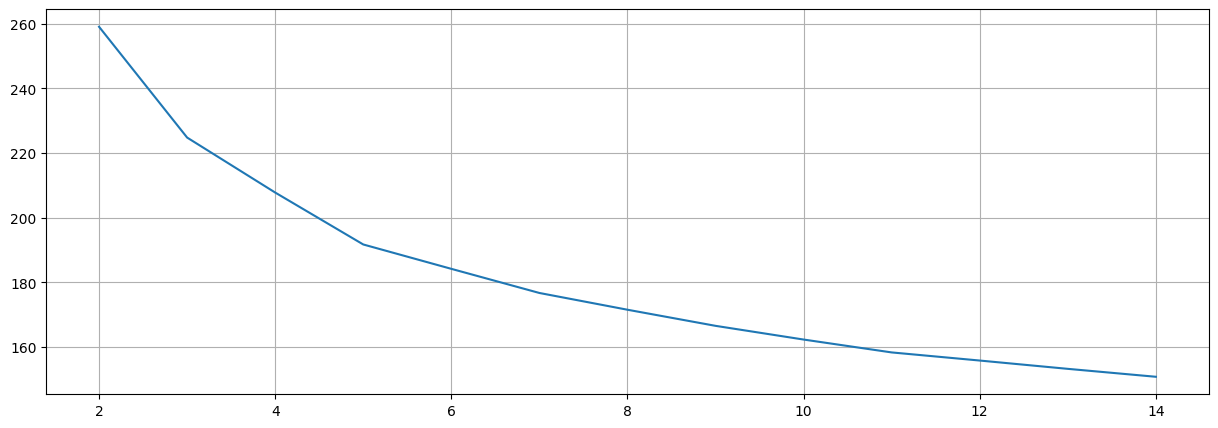

In [5]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [6]:
km = KMeans(n_clusters=4,max_iter = 10_000, n_init = 100, random_state= 61658)
merged_padronized_cluster = km.fit_predict(merged_padronized)
merged_padronized_cluster

array([1, 0, 3, ..., 1, 3, 0])

In [13]:
merged_default['cluster'] = merged_padronized_cluster
merged_default.to_parquet('Q:/Universidade/PISI3/pullebyte-analises/DataSet Project/clustering/clustered-data/clustered_data.parquet')
merged_default

,club_name,club_formation,team_type,yellow_cards,red_cards,goals,assists,cluster
0,Bayer 04 Leverkusen,4-3-3 Attacking,away,2,0,2,2,1
1,manchester united,4-4-1-1,home,1,0,4,4,0
2,real sociedad,4-3-3 Attacking,home,2,0,0,0,3
3,Shakhtar Donetsk,4-2-3-1,away,5,0,2,2,1
4,galatasaray,4-4-2 Diamond,home,3,0,1,1,1
...,...,...,...,...,...,...,...,...
2626,Bayern Munich,4-2-3-1,away,0,0,1,1,0
2627,bayern munich,4-2-3-1,home,2,0,2,2,1
2628,Real Madrid,4-4-2 double 6,away,2,0,2,2,1
2629,borussia dortmund,4-3-3 Attacking,home,3,0,0,0,3


In [8]:
import numpy as np
import locale

locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

for col in merged_default.drop('cluster', axis=1).columns:
    if merged_default.dtypes[col] == object:
        for cl in np.sort(merged_default.cluster.unique()):
            vc = 100 * merged_default.loc[merged_default.cluster==cl, col].value_counts() / (merged_default.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                formatted_cnt = locale.format_string('%.2f', cnt, grouping=True)
                print(f'{cl:d}; {col}{str(cat):s}; {formatted_cnt} %', end='; \n')
    else:
        for cl in np.sort(merged_default.cluster.unique()):
            formatted_mean = locale.format_string('%.2f', merged_default.loc[merged_default.cluster==cl, col].mean(), grouping=True)
            print(f'{cl:d}; {col}; {formatted_mean}', end='; \n')


0; club_namebayern munich; 5,15 %; 
0; club_namereal madrid; 4,74 %; 
0; club_nameBayern Munich; 4,04 %; 
0; club_namefc barcelona; 4,04 %; 
0; club_namemanchester city; 3,90 %; 
0; club_nameReal Madrid; 3,90 %; 
0; club_nameManchester City; 3,48 %; 
0; club_nameparis saint-germain; 3,06 %; 
0; club_nameliverpool fc; 2,79 %; 
0; club_nameParis Saint-Germain; 2,65 %; 
0; club_nameborussia dortmund; 2,65 %; 
0; club_nameatltico de madrid; 2,37 %; 
0; club_nameLiverpool FC; 2,23 %; 
0; club_nameBorussia Dortmund; 2,09 %; 
0; club_namechelsea fc; 2,09 %; 
0; club_namejuventus fc; 1,95 %; 
0; club_namefc porto; 1,95 %; 
0; club_namearsenal fc; 1,67 %; 
0; club_nameChelsea FC; 1,67 %; 
0; club_namessc napoli; 1,67 %; 
0; club_nameSL Benfica; 1,25 %; 
0; club_nameFC Barcelona; 1,25 %; 
0; club_nameJuventus FC; 1,25 %; 
0; club_namerb leipzig; 1,11 %; 
0; club_nameshakhtar donetsk; 1,11 %; 
0; club_nameManchester United; 1,11 %; 
0; club_namesevilla fc; 1,11 %; 
0; club_nameAtltico de Madrid; 

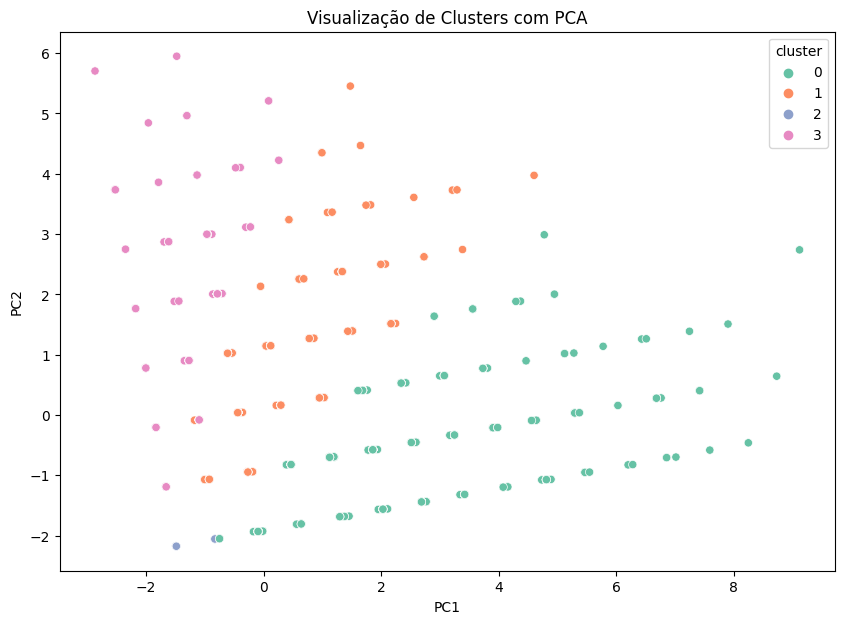

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

# Supondo que seu DataFrame seja merged_default
# Selecionando as colunas numéricas relevantes
X = merged_default[['yellow_cards', 'red_cards', 'goals', 'assists']]

# Aplicando PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Criando um DataFrame com os componentes principais e os clusters
pca_merged_default = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_merged_default['cluster'] = merged_default['cluster']

# Visualizando os clusters em um gráfico de dispersão 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set2', data=pca_merged_default)
plt.title('Visualização de Clusters com PCA')
plt.show()


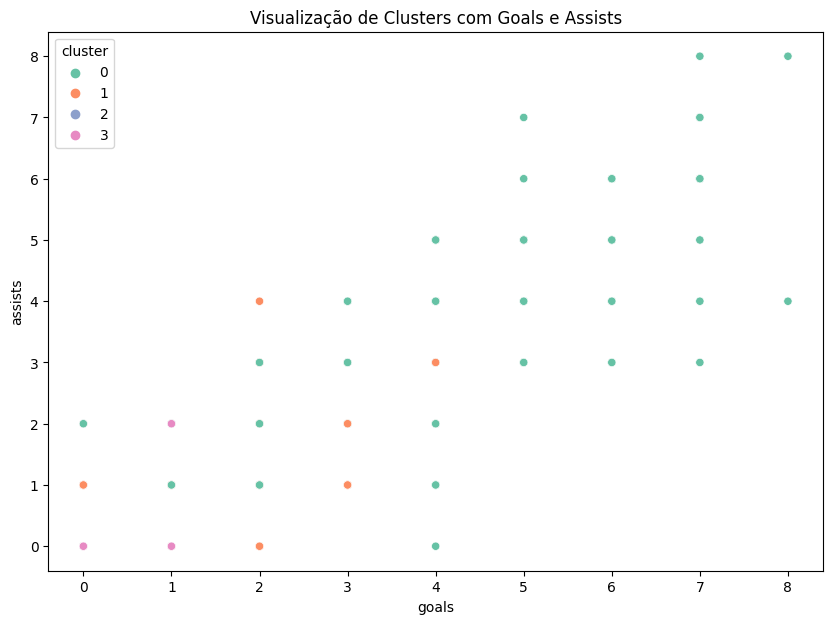

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='goals', y='assists', hue='cluster', palette='Set2', data=merged_default)
plt.title('Visualização de Clusters com Goals e Assists')
plt.show()


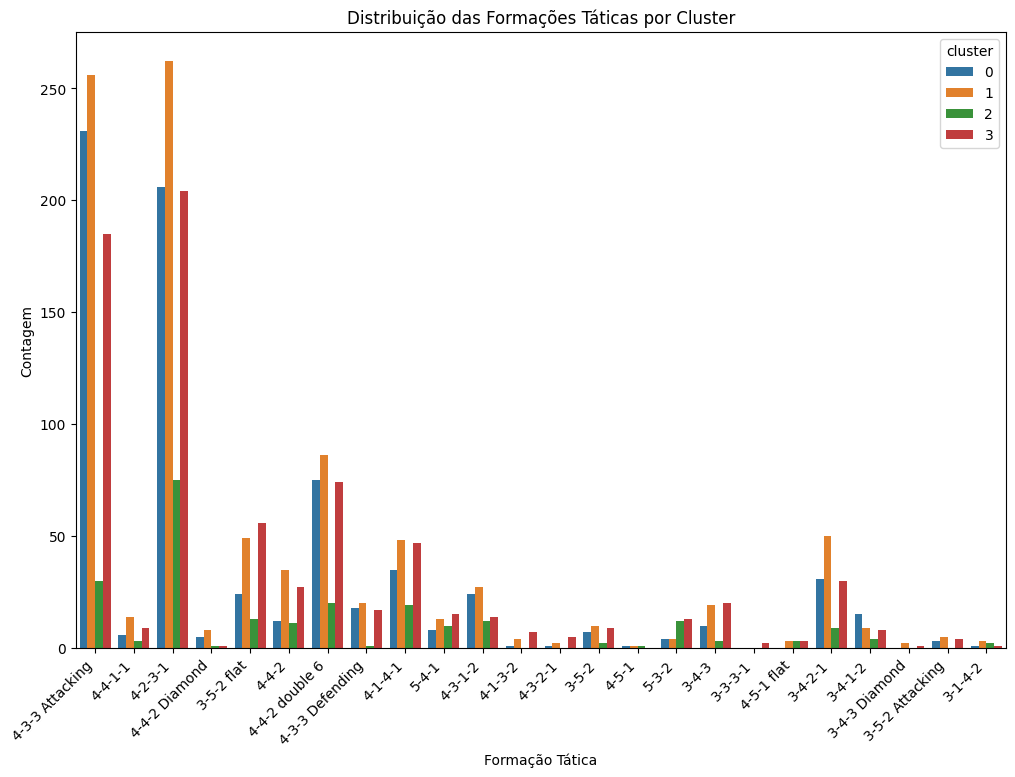

In [11]:
plt.figure(figsize=(12, 8))

# Criando um gráfico de barras que mostra a contagem de cada formação tática, colorido por cluster
sns.countplot(x='club_formation', hue='cluster', data=merged_default)

# Ajustando a rotação das labels do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

plt.title('Distribuição das Formações Táticas por Cluster')
plt.xlabel('Formação Tática')
plt.ylabel('Contagem')

plt.show()